# k-Nearest Neighbors

* kNN Is a Supervised Learner for Both Classification and Regression
* kNN Is a Nonlinear Learning Algorithm

reference : https://scikit-learn.org/stable/modules/neighbors.html
+            https://realpython.com/knn-python/

# The Abalone Problem Statement
The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.

The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

You’ll be applying a kNN to find the closest prediction score possible.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [6]:
abalone = pd.read_csv(url, header=None)

In [7]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
abalone.columns = [
     "Sex",
     "Length",
     "Diameter",
     "Height",
     "Whole weight",
     "Shucked weight",
     "Viscera weight",
     "Shell weight",
     "Rings",
 ]

In [9]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
df = abalone.copy()

In [38]:
df.shape

(4177, 9)

In [39]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:ylabel='No of rings'>

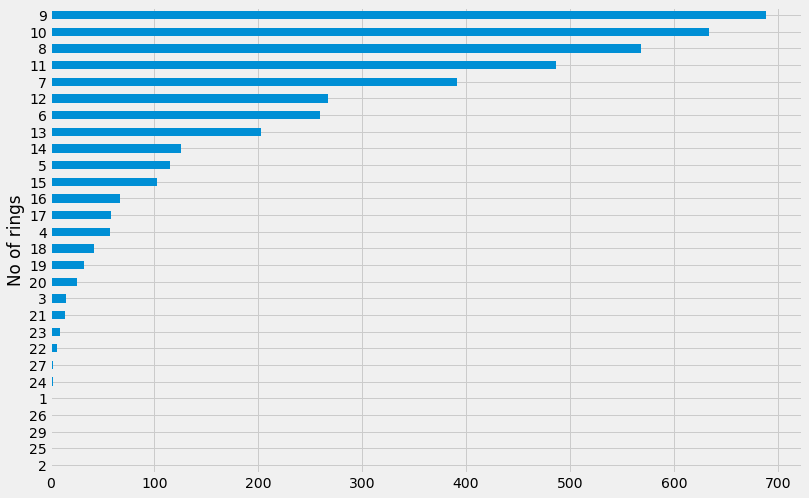

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.ylabel('No of rings')
df.Rings.value_counts().sort_values().plot.barh()

In [41]:
Sex_dummies = pd.get_dummies(df['Sex'])

In [42]:
Sex_dummies.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [43]:
df = pd.concat([df, Sex_dummies], axis=1)

In [44]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [46]:
df = df.drop('Sex', axis =1)

In [47]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [49]:
X = df.drop('Rings', axis=1)

In [50]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [56]:
X = X.values

In [61]:
X.shape

(4177, 10)

In [51]:
y = df.Rings

In [52]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [57]:
y = y.values

## Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10 )

In [62]:
X_train.shape

(3132, 10)

In [65]:
# initialize the model
model = KNeighborsRegressor()

In [66]:
# fit the model
model.fit(X_train, y_train)

KNeighborsRegressor()

In [69]:
# predicting
y_pred = model.predict(X_test)

## inspect our model

C:\Users\cws\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

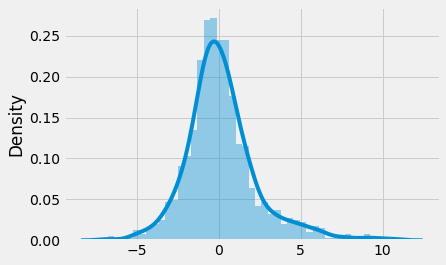

In [74]:
# lets see what is the range of our error
sns.distplot(y_test-y_pred)

our error is uniformly distributed

In [75]:
mean_absolute_error(y_test, y_pred)

1.5458373205741625

## Plotting the Fit of Model

In this code block, we use Seaborn to create a scatter plot of the first and second columns of X_test by subsetting the arrays X_test[:,0] and X_test[:,1]. Remember from before that the first two columns are Length and Diameter. They are strongly correlated, as you’ve seen in the correlations table.

we use c to specify that the predicted values (test_preds) should be used as a colorbar. The argument s is used to specify the size of the points in the scatter plot. we use cmap to specify the cubehelix_palette color map.

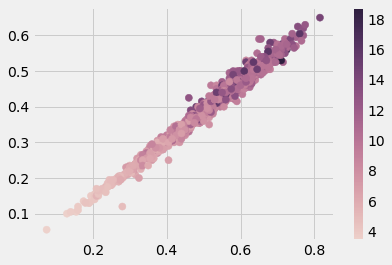

In [76]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()



On this graph, each point is an abalone from the test set, with its actual length and actual diameter on the X- and Y-axis, respectively. The color of the point reflects the predicted age. You can see that the longer and larger an abalone is, the higher its predicted age. This is logical, and it’s a positive sign. It means that your model is learning something that seems correct.

To confirm whether this trend exists in actual abalone data, you can do the same for the actual values by simply replacing the variable that is used for c:

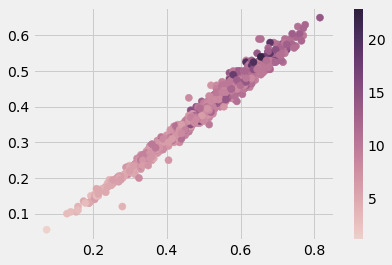

In [77]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

This confirms that the trend your model is learning does indeed make sense.

# Optimize kNN

In [80]:
parameters = {
             "n_neighbors": range(5, 15, 2),
             "weights" : ['uniform', 'distance'],
             "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [81]:
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)

In [82]:
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(5, 15, 2),
                         'weights': ['uniform', 'distance']})

In [83]:
gridsearch.best_params_

{'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'distance'}

In [84]:
y_pred = gridsearch.predict(X_test)

C:\Users\cws\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

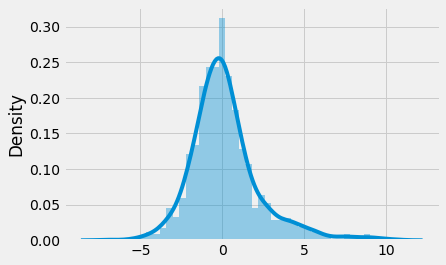

In [85]:
sns.distplot(y_test-y_pred)

In [86]:
mean_absolute_error(y_test, y_pred)

1.4888229842964966